### Demonstrate sample size calculators for poisson tests

The sample size calculations are based on Poisson tests.

In particular, two Poisson processes with failure rates gamma0, gamma1
are observed for fixed times s0, s1.  The number of outcomes observed X0, X1
are assumed to be Poisson random variables with means gamma0 $\times$ s0 and gamma1 $\times$ s1.

**Notation:**

r = gamma1/gamma0        (the "rate ratio")

d = s1/s0

alpha = significance level

beta = 1 - Power

alpha = type I error

beta = type II error

In [8]:
from poisson_tests import TwoSamplePoissonTest;

#### Planes example in Huffman    

cf. Huffman, "An improved approximate two-sample poisson test".  Appl Stat 1984.

In [12]:
alpha = 0.05
beta = 0.10
r = 2.
d = 2.
#
for method in ['ShiueBain', 'Huffman', 'WuMakuch']:
    t = TwoSamplePoissonTest(r,d,alpha,beta,method=method)
    print('{:10s} {:10.4f}'.format(method, t))

# Huffman reports 19.5 for Shiue-Bain 
# and 18.7 for his own test.

ShiueBain     19.4757
Huffman       18.7177
WuMakuch      13.0157


#### Table 1 in Wu & Makuch

In [14]:
alpha = 0.025
beta = 0.2
gamma0 = 0.001
gamma1 = 0.003
r = gamma1/gamma0
d = 0.681
for method in ['ShiueBain', 'Huffman', 'WuMakuch']:
    t = TwoSamplePoissonTest(r,d,alpha,beta,method=method) / gamma0
    print('{:10s} {:10.4f}'.format(method, t))

ShiueBain   9301.9174
Huffman     9038.2809
WuMakuch    9995.8199


#### Compare estimators across different rate ratios

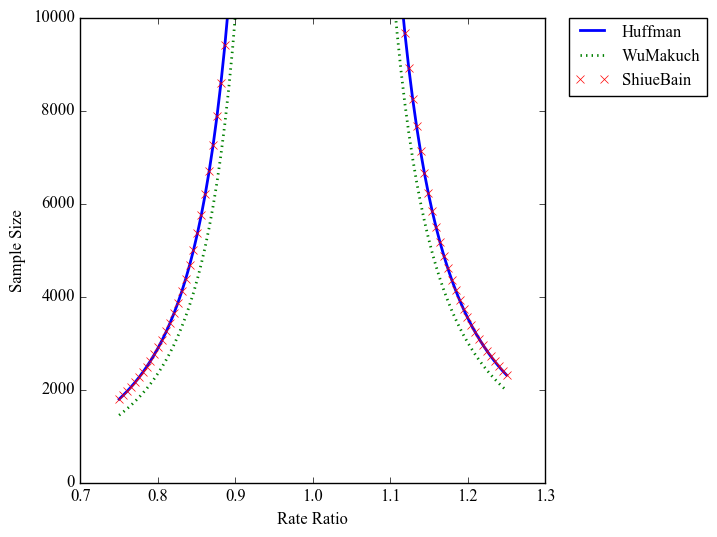

In [17]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'family':'Times New Roman', 'weight':'normal', 'size':20})
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05 / 2    # divide by 2 for two-sided test
beta = 0.20
d = 1.
gamma0 = 0.061   
rateratio = np.linspace(0.75,1.25,100)    # rate ratio    

fig = plt.figure()    
fig.set_size_inches(6,6)  
ax = fig.add_subplot(111)   

lambda0 = [TwoSamplePoissonTest(r,d,alpha,beta,method='Huffman') for r in rateratio]
samplesize = [s/(2*gamma0) for s in lambda0]
plt.plot(rateratio, samplesize, '-', lw=2, color='blue', label='Huffman')

lambda0 = [TwoSamplePoissonTest(r,d,alpha,beta,method='WuMakuch') for r in rateratio]
samplesize = [s/(2*gamma0) for s in lambda0]
plt.plot(rateratio, samplesize, ':', lw=2, color='green', label='WuMakuch')

lambda0 = [TwoSamplePoissonTest(r,d,alpha,beta,method='ShiueBain') for r in rateratio]
samplesize = [s/(2*gamma0) for s in lambda0]
plt.plot(rateratio, samplesize, 'x', lw=2, color='red', label='ShiueBain')   

plt.xlabel('Rate Ratio',fontsize=12) 
plt.ylabel('Sample Size',fontsize=12)
ax.tick_params(labelsize=12)   

ax.set_ylim([0.,10000.])
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.,fontsize=12)         

plt.show()